# 多层感知器-MLP
多层感知机（MLP，Multilayer Perceptron）也叫人工神经网络（ANN，Artificial Neural Network），除了输入输出层，它中间可以有多个隐层，最简单的MLP只含一个隐层，即三层的结构。

## 导入库

In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 超参

In [2]:
EPOCHS = 50
BATCH_SIZE = 256
VALIDATION_SPLIT = 0.3
VERBOSE = 1

## 导入数据集

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images = tf.reshape(train_images, (train_images.shape[0], train_images.shape[1]*train_images.shape[2]))
test_images = tf.reshape(test_images, (test_images.shape[0], test_images.shape[1]*test_images.shape[2]))

In [6]:
train_images.shape

TensorShape([60000, 784])

## 定义模型

In [7]:
model = keras.Sequential([
    keras.layers.Dense(256, activation='relu', input_shape=(784,)),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


## 设置优化器和损失函数

In [8]:
model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

## 开始训练

In [9]:
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALIDATION_SPLIT, verbose=VERBOSE)

Train on 42000 samples, validate on 18000 samples
Epoch 1/50
42000/42000 [==============================] - 1s 19us/sample - loss: 5.1371 - accuracy: 0.7268 - val_loss: 1.3282 - val_accuracy: 0.7483
Epoch 2/50
42000/42000 [==============================] - 0s 10us/sample - loss: 0.7740 - accuracy: 0.8084 - val_loss: 0.7127 - val_accuracy: 0.8110
Epoch 3/50
42000/42000 [==============================] - 0s 10us/sample - loss: 0.5523 - accuracy: 0.8311 - val_loss: 0.6214 - val_accuracy: 0.8179
Epoch 4/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.4750 - accuracy: 0.8473 - val_loss: 0.5793 - val_accuracy: 0.8158
Epoch 5/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.4240 - accuracy: 0.8554 - val_loss: 0.5825 - val_accuracy: 0.8159
Epoch 6/50
42000/42000 [==============================] - 0s 9us/sample - loss: 0.3614 - accuracy: 0.8706 - val_loss: 0.5608 - val_accuracy: 0.8346
Epoch 7/50
42000/42000 [==============================] - 0

## 绘制梯度下降图

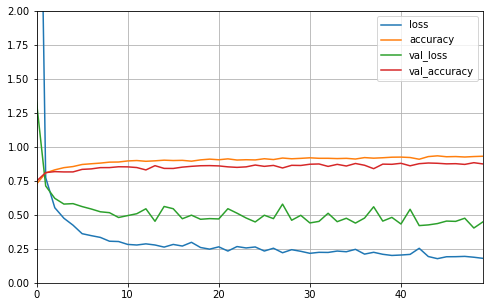

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
    
plot_learning_curves(history)

## 测试训练好的模型

In [11]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/sample - loss: 0.4917 - accuracy: 0.8670


[0.4917440696001053, 0.86700004]

## 保存模型 

In [12]:
model.save('./save/save_model/model.h5')

In [13]:
model.save_weights('./save/save_weights/model_weights.h5')